Michael Cantone

#<u> Standard imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#<u>Import Specific Models

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

#<u>Import for Splitting Data and Building Pipeline

In [54]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

#<u>Imports for Performance Measures

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, classification_report

#<u>Confusion Matrix Function

In [5]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

#<u>ROC_Curve Function

In [6]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

#<u> Aquire Data

In [14]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/breast_cancer.csv')

#<u> Statistics and Visual Exploration

In [15]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [16]:
df['Classification'].value_counts()

,count
Classification,
2,64
1,52


In [17]:
classification_values = df['Classification'].value_counts()
df_classification_values = pd.DataFrame(classification_values)
print(df_classification_values)

                count
Classification       
2                  64
1                  52


<Axes: xlabel='Classification'>

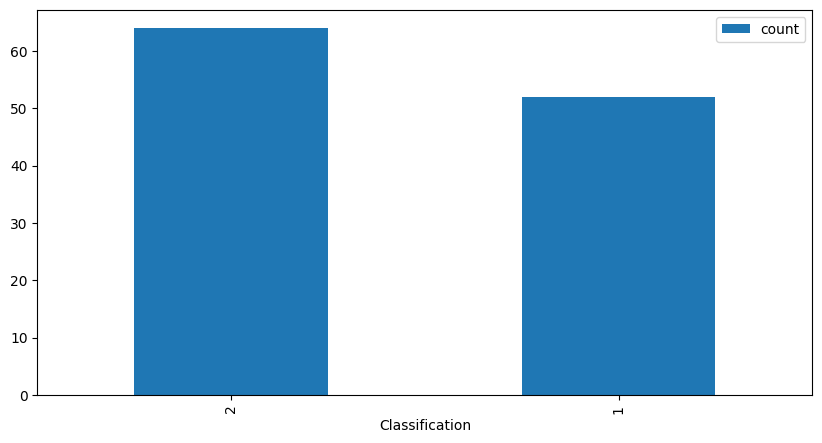

In [18]:
df_classification_values.plot(kind = 'bar', figsize=(10,5))

1 = Healthy Controls <br> 2 = Patients

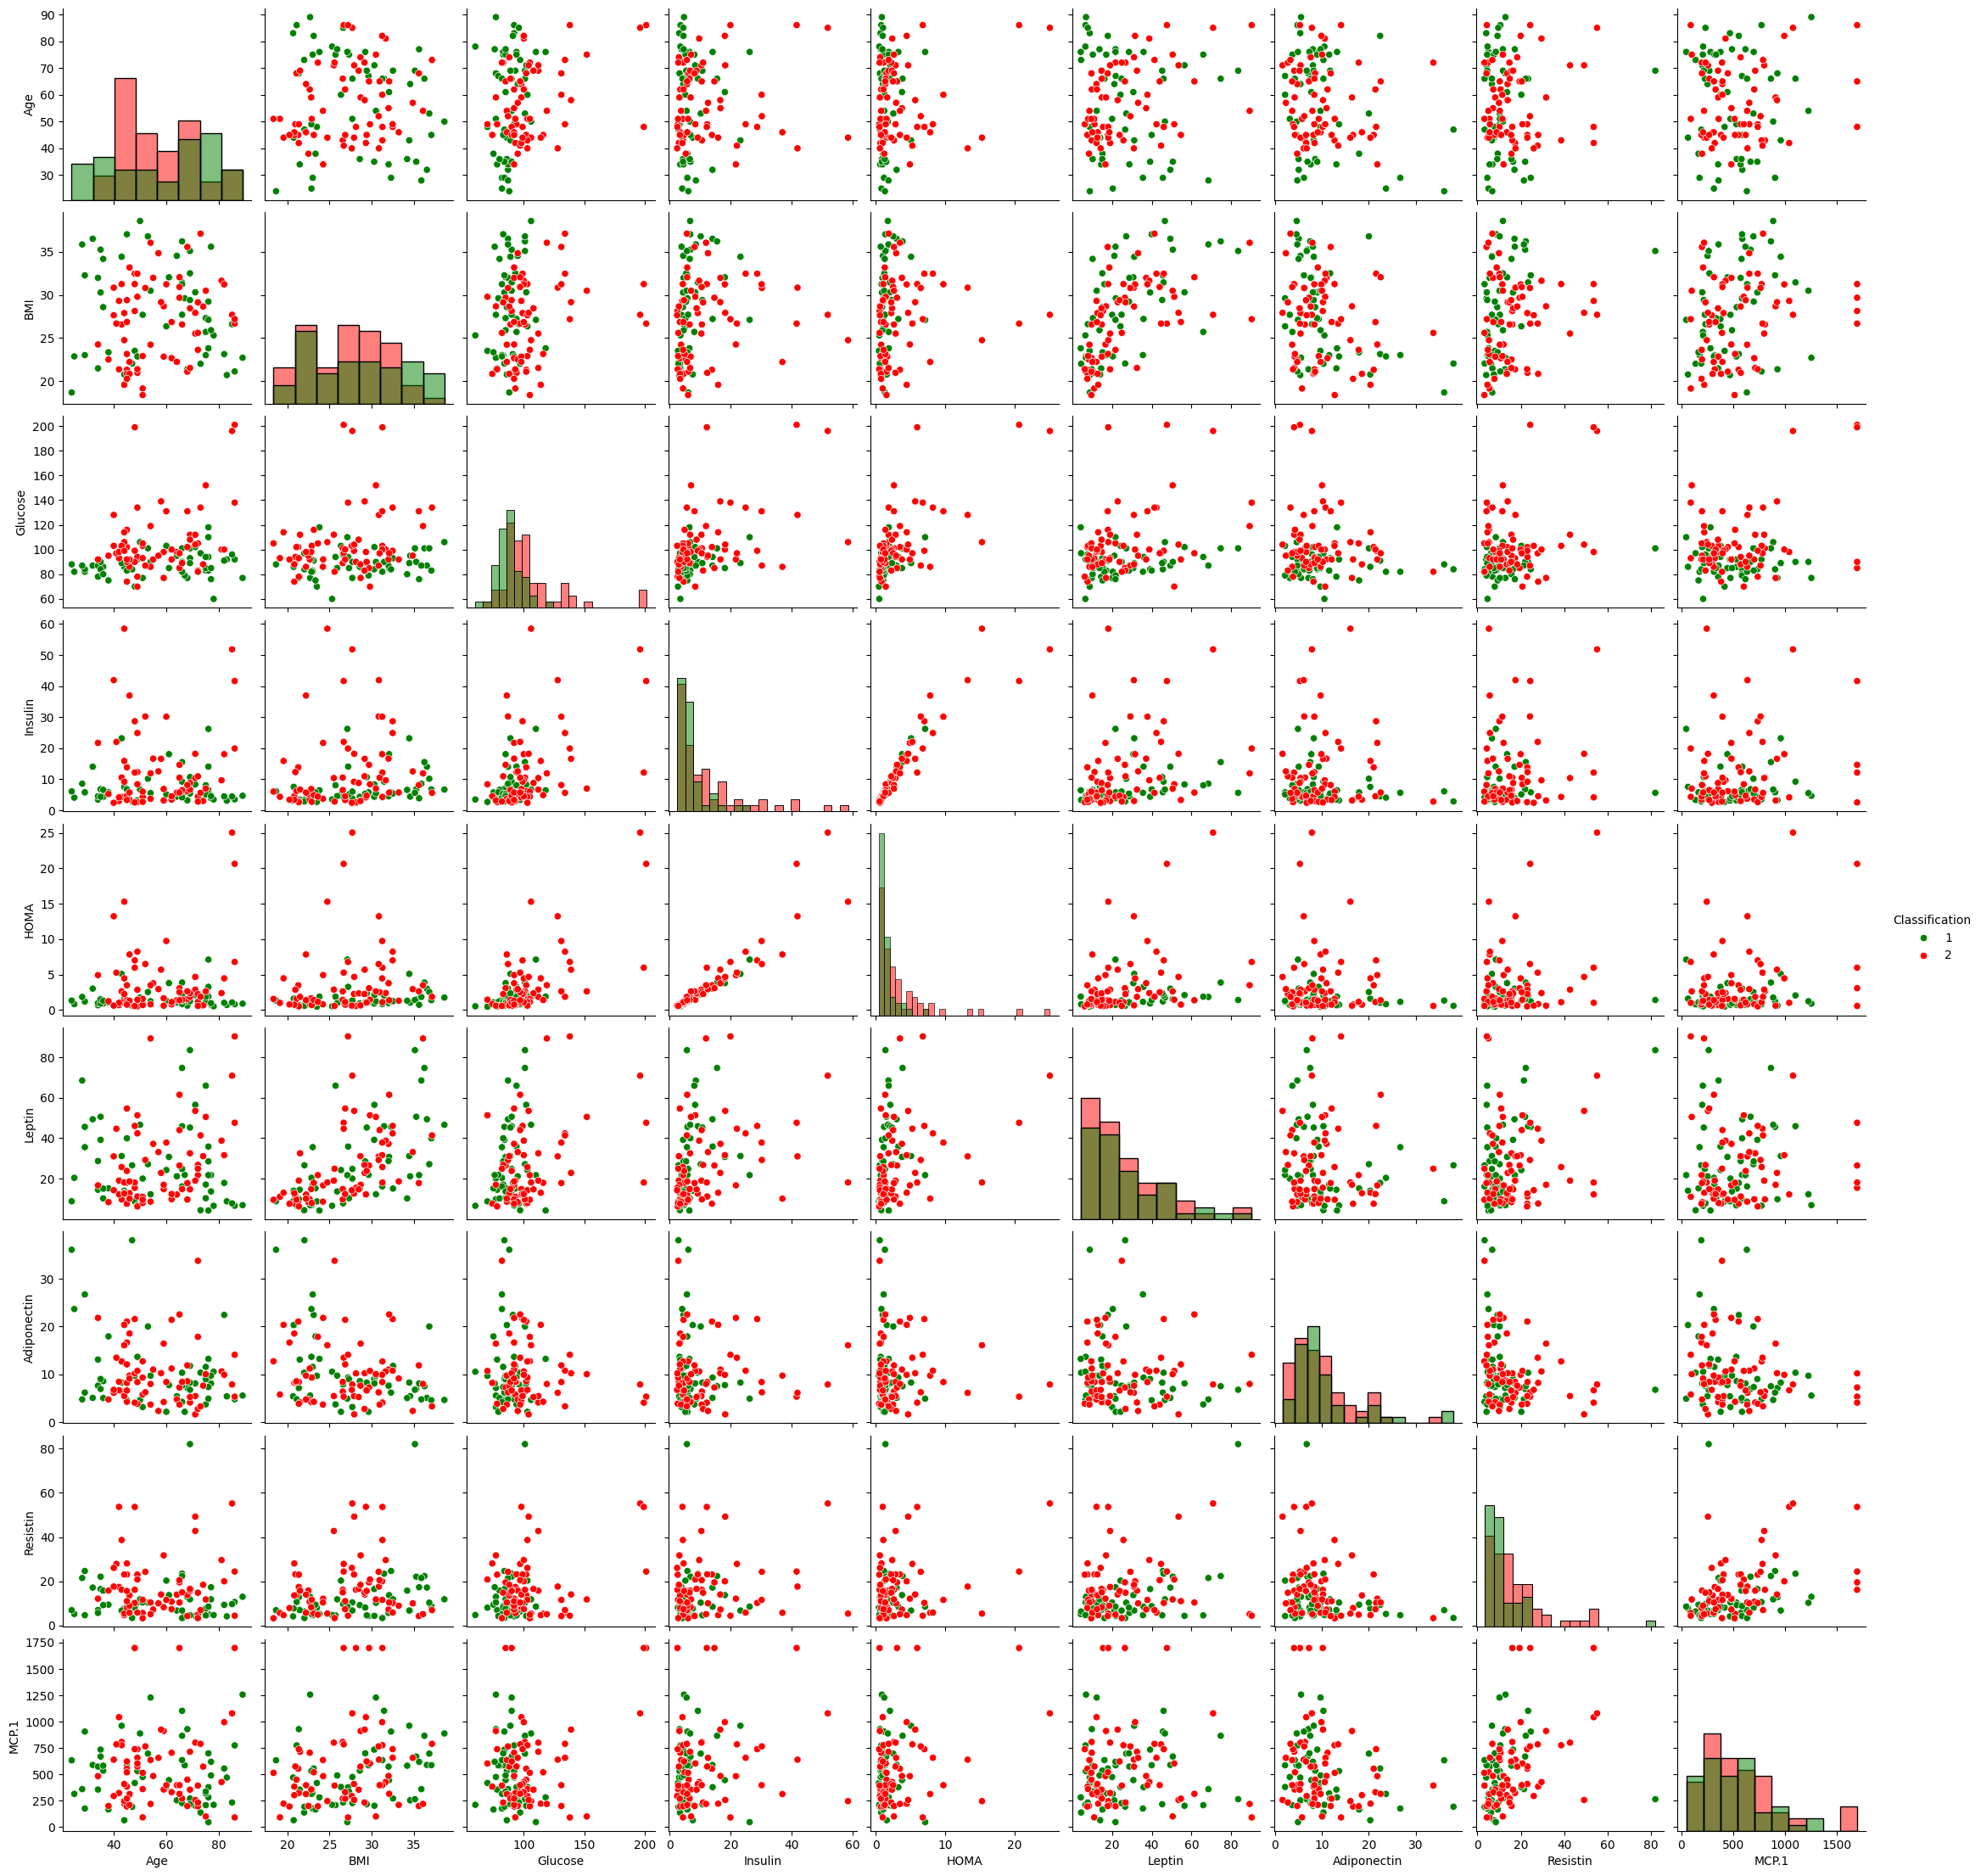

In [25]:
df_numeric = df.select_dtypes(include=['number'])
sns.pairplot(df_numeric, hue = 'Classification',palette={1: "green", 2: "red"}, diag_kind="hist")
plt.show()

#<u> Splitting the Data into Train/Test

In [26]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [27]:
x = df[['Age', 'BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']]
y= df['Classification']

In [28]:
x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#<u> Building a Pipeline

In [29]:
num_attribs = ['Age', 'BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']
cat_attribs = []

col_transform = ColumnTransformer([
    ('num', MinMaxScaler(), num_attribs),
])

In [55]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('poly', PolynomialFeatures()),
    ('mlr', LogisticRegression(max_iter=10000))
])

#<u> Running the Model

In [56]:
pipeline.fit(x_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age', 'BMI', 'Glucose',
                                                   'Insulin', 'HOMA', 'Leptin',
                                                   'Adiponectin', 'Resistin',
                                                   'MCP.1'])])),
                ('poly', PolynomialFeatures()),
                ('mlr', LogisticRegression(max_iter=10000))])

#<u> Evaluating the Model

In [57]:
y_pred = pipeline.predict(x_test)

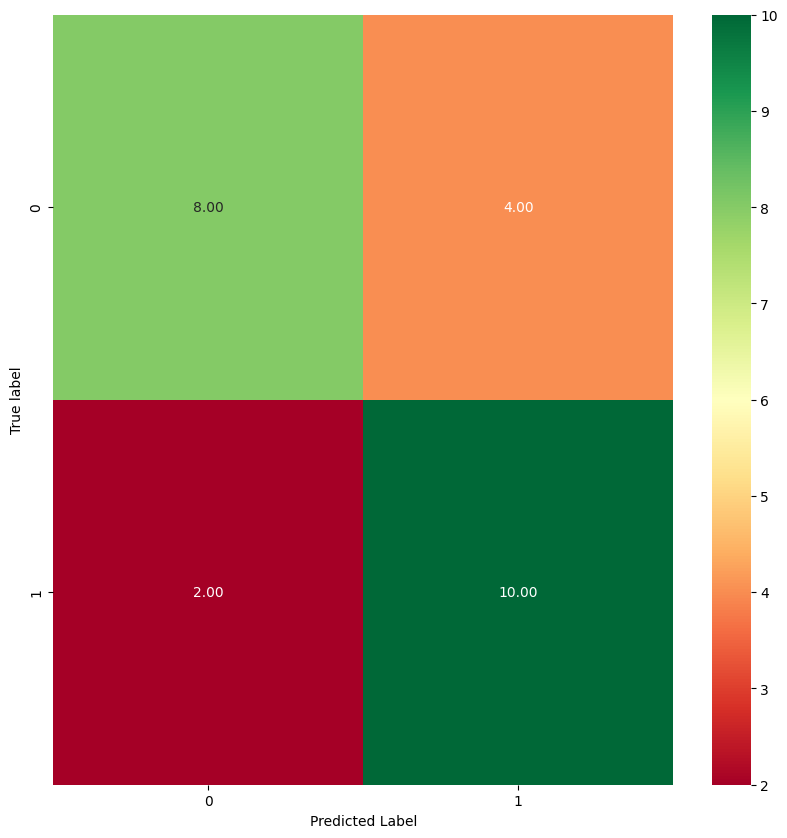

In [58]:
plot_cm(y_test,y_pred)

In [59]:
print("Precision Score: ",precision_score(y_test,y_pred))
print("Recall Score:    ",recall_score(y_test,y_pred))
print("F1 Score:        ",f1_score(y_test,y_pred))
print("Accuracy Score:  ",accuracy_score(y_test,y_pred))

Precision Score:  0.8
Recall Score:     0.6666666666666666
F1 Score:         0.7272727272727273
Accuracy Score:   0.75


#<u> Grid Search

In [63]:
param_grid={
    'poly__degree': [1,2,3]
}

In [64]:
grid_search =  GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Age',
                                                                          'BMI',
                                                                          'Glucose',
                                                                          'Insulin',
                                                                          'HOMA',
                                                                          'Leptin',
                                                                          'Adiponectin',
                                                                          'Resistin',
                                                                          'MCP.1'])])),
                                       ('poly', PolynomialFeatures()),
                                       ('mlr',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'poly__degree': [1, 2, 3]}, scoring='accuracy')

In [65]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'poly__degree': 3}
Best score:  0.6309941520467837


Confusion Matrix:


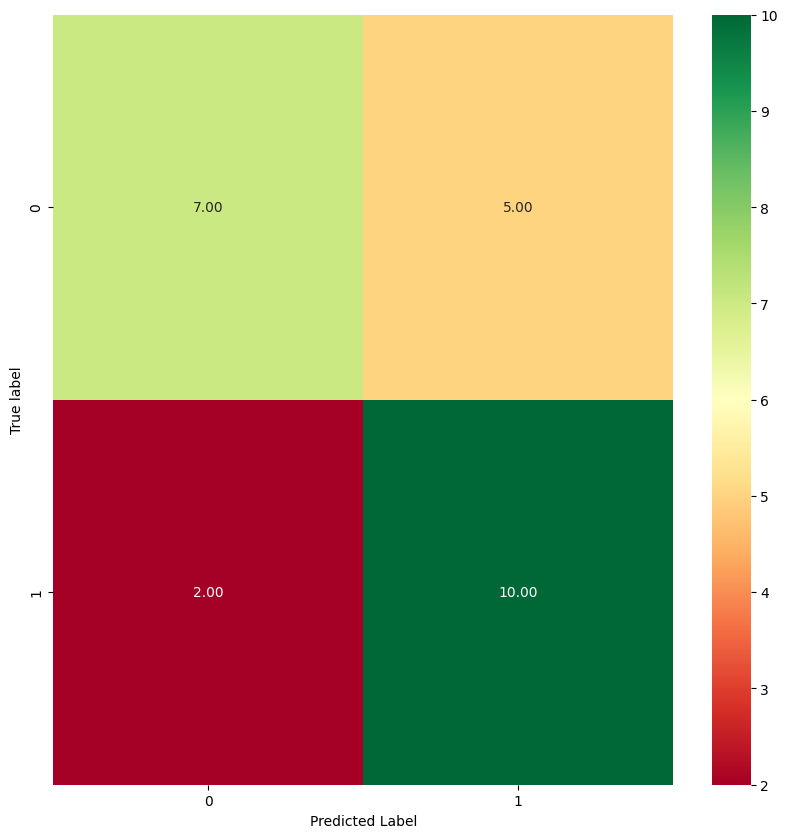

In [69]:
print("Confusion Matrix:")
plot_cm(y_test,y_pred)

In [72]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.58      0.67        12
           2       0.67      0.83      0.74        12

    accuracy                           0.71        24
   macro avg       0.72      0.71      0.70        24
weighted avg       0.72      0.71      0.70        24



In [73]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7083333333333334


#<u> Decision Tree Model

#<u> Splitting Data into Train/Test

In [75]:
X = df[['Age', 'BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']]
Y = df['Classification']

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#<u> Building a Pipeline

In [77]:
num_attribs = [ 'Age', 'BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']
cat_attribs = []

col_transform = ColumnTransformer([
    ('num', MinMaxScaler(), num_attribs),
], remainder = 'passthrough')

In [78]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('decision_tree', tree.DecisionTreeClassifier(max_depth = 5))
])

#<u> Executing the Model

In [79]:
pipeline.fit(X_train, np.ravel(Y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Age', 'BMI', 'Glucose',
                                                   'Insulin', 'HOMA', 'Leptin',
                                                   'Adiponectin', 'Resistin',
                                                   'MCP.1'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

#<u> Evaluating the Model

In [80]:
Y_pred = pipeline.predict(X_test)

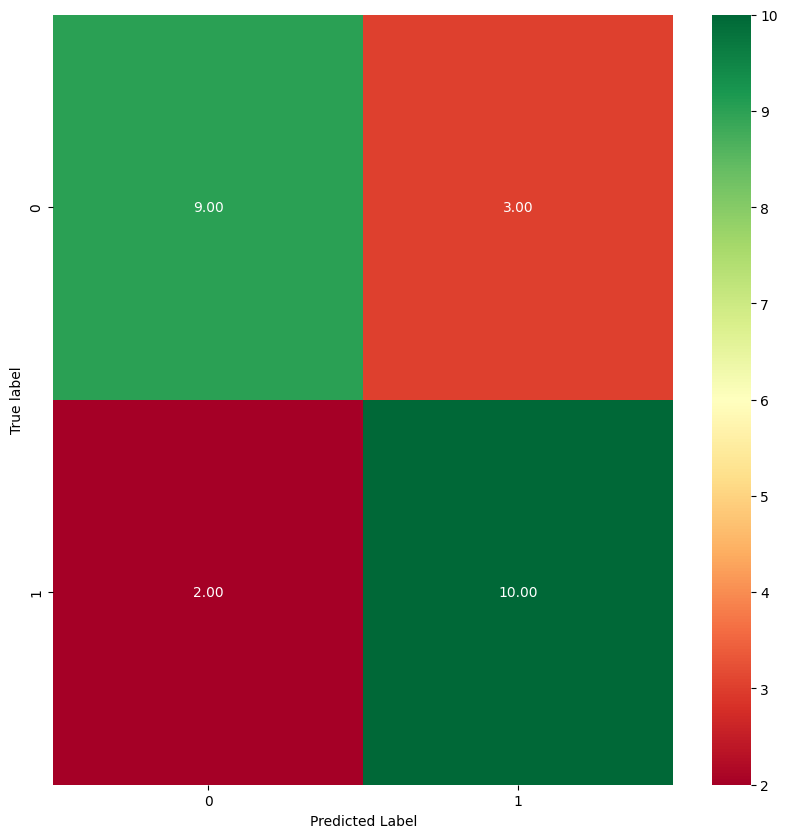

In [81]:
plot_cm(Y_test, Y_pred)

In [84]:
print('Precision: %.3f' % precision_score(Y_test, Y_pred))
print('Recall: %.3f' % recall_score(Y_test, Y_pred))
print('F1 Score: %.3f' % f1_score(Y_test, Y_pred))
print('Accuracy: %.3f' % accuracy_score(Y_test, Y_pred))

Precision: 0.818
Recall: 0.750
F1 Score: 0.783
Accuracy: 0.792


#<u> Conclusion

Between the Logistic Regression model and the Decision Tree model, <br> the Decision Tree his more effective. We see that the performance scores <br> are higher for Decision Tee; however, both models are pretty inacurrate when<br> predicting breast cancer. This is probably due to the nature of the data. <br>
Breast cancer is hard to predict and often times needs more invasive <br>
practices to know if someone has breast cancer.